In [1]:
%load_ext autoreload
%autoreload 2

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import neurosym as ns
import neurosym.examples.tower as tower
# import neurosym.examples.dreamcoder as dreamcoder
# from neurosym.program_dist.tree_dist_enumerator import *

In [43]:
dsl = tower.tower_dsl()
tasks = tower.dreamcoder_tower_tasks()
plan_to_idx = {tower.execute_tower(t.program)[1]: i for i, t in enumerate(tasks)}

In [51]:
print(dsl.render())

              0 :: () -> i
              1 :: () -> i
              2 :: () -> i
              3 :: () -> i
              4 :: () -> i
              5 :: () -> i
              6 :: () -> i
              7 :: () -> i
              8 :: () -> i
              9 :: () -> i
              + :: (i, i) -> i
              - :: (i, i) -> i
              * :: (i, i) -> i
              / :: (i, i) -> i
              l :: i -> t -> to
              r :: i -> t -> to
              v :: () -> t -> to
              h :: () -> t -> to
              t :: () -> t -> to
             h2 :: () -> t -> to
           semi :: (t -> to, t -> to) -> t -> to
            for :: (i, i -> t -> to) -> t -> to
          embed :: (t -> to) -> t -> to
            lam :: L<#body|i> -> i -> #body
           $0_0 :: V<i@0>
           $1_0 :: V<i@1>
           $2_0 :: V<i@2>
           $3_0 :: V<i@3>


In [50]:
for t in tasks:
    print(ns.render_s_expression(t.program))

(semi (for (1) (lam (v))) (semi (r (4)) (semi (for (1) (lam (v))) (semi (l (2)) (h)))))
(semi (for (2) (lam (v))) (semi (r (4)) (semi (for (2) (lam (v))) (semi (l (2)) (h)))))
(semi (for (3) (lam (v))) (semi (r (4)) (semi (for (3) (lam (v))) (semi (l (2)) (h)))))
(semi (for (4) (lam (v))) (semi (r (4)) (semi (for (4) (lam (v))) (semi (l (2)) (h)))))
(semi (for (5) (lam (v))) (semi (r (4)) (semi (for (5) (lam (v))) (semi (l (2)) (h)))))
(semi (for (6) (lam (v))) (semi (r (4)) (semi (for (6) (lam (v))) (semi (l (2)) (h)))))
(semi (for (7) (lam (v))) (semi (r (4)) (semi (for (7) (lam (v))) (semi (l (2)) (h)))))
(semi (for (8) (lam (v))) (semi (r (4)) (semi (for (8) (lam (v))) (semi (l (2)) (h)))))
(for (4) (lam (semi (h) (r (7)))))
(for (5) (lam (semi (v) (r (3)))))
(for (2) (lam (semi (for (1) (lam (semi (v) (semi (r (4)) (semi (v) (l (4))))))) (semi (r (2)) (semi (h) (r (4)))))))
(for (2) (lam (semi (for (2) (lam (semi (v) (semi (r (4)) (semi (v) (l (4))))))) (semi (r (2)) (semi (h) (r 

In [30]:
dist_family = ns.BigramProgramDistributionFamily(dsl)
uniform = dist_family.uniform()

In [114]:
shortest_program_by_output = {}
rng = np.random.RandomState(0)
for _ in range(1000):
    try:
        p = dist_family.sample(uniform, rng)
        _, res = tower.execute_tower(p)
    except ZeroDivisionError:
        continue
    p = ns.render_s_expression(p)
    if res not in shortest_program_by_output:
        shortest_program_by_output[res] = p
        # print(len(shortest_program_by_output), res, p)
    elif len(shortest_program_by_output[res]) > len(p):
        shortest_program_by_output[res] = p
    if len(shortest_program_by_output) == 100:
        break
shortest_program_by_output = {k : ns.parse_s_expression(v) for k, v in shortest_program_by_output.items()}

In [115]:
len(shortest_program_by_output)

95

In [116]:
print("\n".join(ns.render_s_expression(x) for x in shortest_program_by_output.values()))

(l (6))
(h2)
(v)
(t)
(for (4) (lam (v)))
(h)
(semi (h2) (h2))
(semi (embed (semi (semi (for (+ (0) (1)) (lam (h2))) (v)) (embed (for (- (5) (/ (2) (/ (- (+ (5) (+ (- (1) (7)) (+ (7) (+ (9) (2))))) (9)) (4)))) (lam (embed (h))))))) (for (0) (lam (h))))
(semi (for (6) (lam (for (3) (lam (t))))) (embed (semi (h) (semi (v) (h)))))
(semi (h) (t))
(for (2) (lam (v)))
(embed (semi (l (6)) (t)))
(semi (for (3) (lam (for ($0_0) (lam (h))))) (h2))
(semi (embed (for (4) (lam (h)))) (v))
(for (3) (lam (h)))
(semi (h2) (for (* (* (5) (2)) (3)) (lam (v))))
(for (5) (lam (embed (semi (h) (h2)))))
(for (9) (lam (for (9) (lam (h)))))
(for (3) (lam (semi (h2) (r (+ (+ (2) (0)) (9))))))
(semi (t) (h))
(semi (h) (h2))
(for (* (6) (* (6) (- (+ (+ (5) (/ (1) (3))) (8)) (6)))) (lam (for ($0_0) (lam (h)))))
(for (7) (lam (semi (t) (semi (h) (h2)))))
(for (4) (lam (embed (h2))))
(semi (embed (semi (t) (h))) (h2))
(semi (h) (for (2) (lam (t))))
(for (8) (lam (v)))
(for (5) (lam (embed (semi (h) (embed (embed (e

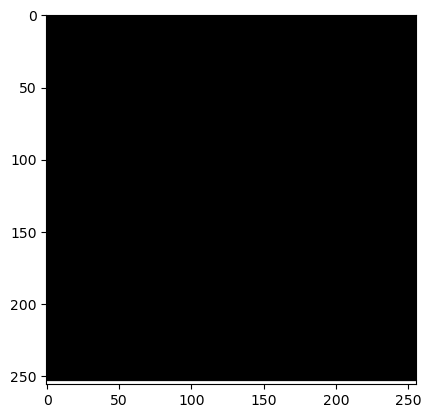

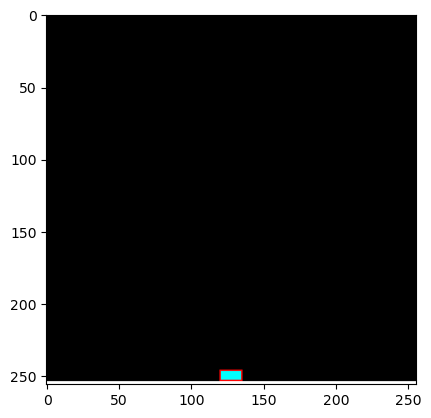

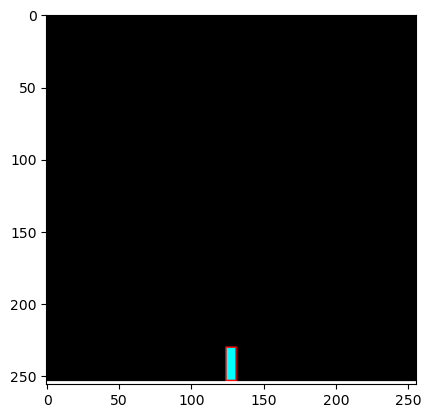

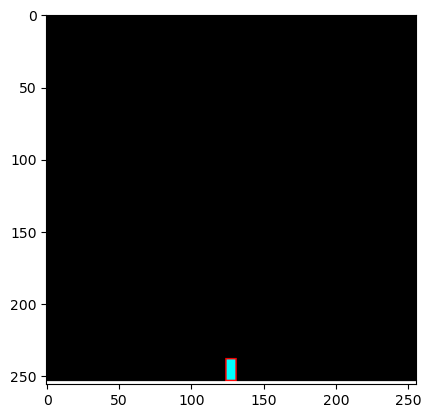

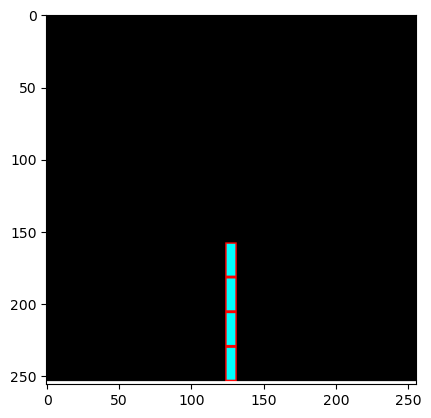

In [119]:
for plan in list(shortest_program_by_output)[:5]:
    rend_plan = tower.render_plan(plan)
    plt.imshow(rend_plan)
    plt.show()

In [130]:
shortest_program_by_output

{(): SExpression(symbol='l', children=(SExpression(symbol='6', children=()),)),
 ((0, 4, 2),): SExpression(symbol='h2', children=()),
 ((0, 2, 6),): SExpression(symbol='v', children=()),
 ((0, 2, 4),): SExpression(symbol='t', children=()),
 ((0, 2, 6),
  (0, 2, 6),
  (0, 2, 6),
  (0,
   2,
   6)): SExpression(symbol='for', children=(SExpression(symbol='4', children=()), SExpression(symbol='lam', children=(SExpression(symbol='v', children=()),)))),
 ((0, 6, 2),): SExpression(symbol='h', children=()),
 ((0, 4, 2),
  (0,
   4,
   2)): SExpression(symbol='semi', children=(SExpression(symbol='h2', children=()), SExpression(symbol='h2', children=()))),
 ((0, 4, 2),
  (0, 2, 6),
  (0, 6, 2),
  (0, 6, 2),
  (0, 6, 2),
  (0,
   6,
   2)): SExpression(symbol='semi', children=(SExpression(symbol='embed', children=(SExpression(symbol='semi', children=(SExpression(symbol='semi', children=(SExpression(symbol='for', children=(SExpression(symbol='+', children=(SExpression(symbol='0', children=()), SEx

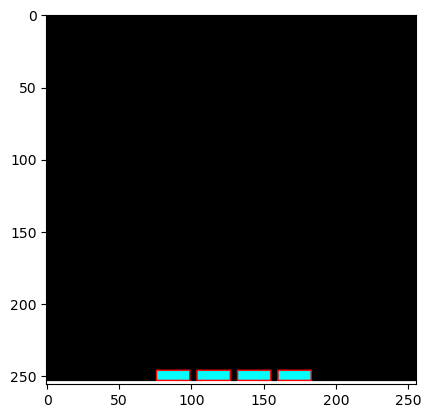

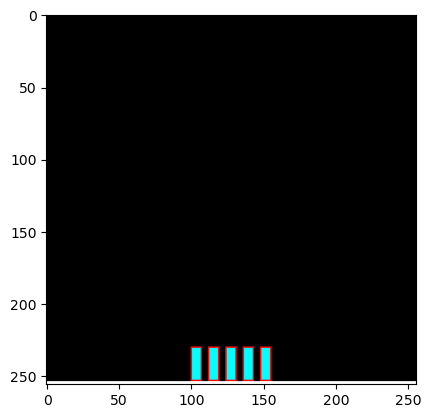

In [98]:
for plan in list(plan_to_idx)[8:10]:
    rend_plan = tower.render_plan(plan)
    plt.imshow(rend_plan)
    plt.show()

In [68]:
dist = dist_family.fit_distribution(list(shortest_program_by_output.values()))

In [89]:
plan = ((0, 2, 6), (4, 2, 6), (2, 6, 2))

plan_to_idx[plan]

0

In [96]:
ns.render_s_expression(tasks[8].program)

'(for (4) (lam (semi (h) (r (7)))))'

In [95]:
tower.execute_tower(tower.parse_sugared('(semi (v) (semi (r (4)) (semi (v) (semi (l (2)) (h)))))'))

(2, ((0, 2, 6), (4, 2, 6), (2, 6, 2)))

In [71]:
programs_each = {}
for i, (p, prob) in enumerate(dist_family.enumerate(dist)):
    if i % 10_000 == 0:
        print(i)
    try:
        _, res = tower.execute_tower(p)
    except ZeroDivisionError:
        continue
    if res not in plan_to_idx:
        continue
    program_str = ns.render_s_expression(p)
    idx = plan_to_idx[res]
    print(idx, res, program_str)
    print(i, prob)

0
8 ((0, 6, 2), (7, 6, 2), (14, 6, 2), (21, 6, 2)) (for (4) (lam (semi (h) (r (7)))))
6215 -12.61114239692688
10000
20000
30000
9 ((0, 2, 6), (3, 2, 6), (6, 2, 6), (9, 2, 6), (12, 2, 6)) (for (5) (lam (semi (v) (r (3)))))
34334 -13.364914417266846
40000
50000
8 ((0, 6, 2), (7, 6, 2), (14, 6, 2), (21, 6, 2)) (semi (h) (for (3) (lam (semi (r (7)) (h)))))
53505 -14.916009038686752
60000
70000
80000
90000
9 ((0, 2, 6), (3, 2, 6), (6, 2, 6), (9, 2, 6), (12, 2, 6)) (semi (for (4) (lam (semi (v) (r (3))))) (v))
96857 -16.589675277471542
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
8 ((0, 6, 2), (7, 6, 2), (14, 6, 2), (21, 6, 2)) (semi (for (3) (lam (semi (h) (r (7))))) (h))
240959 -15.832299798727036
250000
9 ((0, 2, 6), (3, 2, 6), (6, 2, 6), (9, 2, 6), (12, 2, 6)) (semi (v) (for (4) (lam (semi (r (3)) (v)))))
255281 -15.67338451743126
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
4

KeyboardInterrupt: 

((0, 6, 2),)

In [88]:
text = "(/seq (for i (8) (/seq (v))) (r (4)) (for i (8) (/seq (v))) (l (2)) (h))"
text = "(semi (r (4)) (v))"
text = "(for (4) (semi (r (4)) (v)))"

In [89]:
print(dsl.render())

              4 :: () -> i
              r :: i -> t -> to
              v :: () -> t -> to
              h :: () -> t -> to
              t :: () -> t -> to
             h2 :: () -> t -> to
           semi :: (t -> to, t -> to) -> t -> to
            for :: (i, i -> t -> to) -> t -> to
            lam :: L<#body|i> -> i -> #body
           $0_0 :: V<i@0>
           $1_0 :: V<i@1>
           $2_0 :: V<i@2>
           $3_0 :: V<i@3>


In [90]:
dsl = ns.examples.tower.tower_dsl()
res = dsl.compute(dsl.initialize(ns.parse_s_expression(text)))(ns.examples.tower.TowerState())

In [91]:
res

(S(h=16,o=1), [(4, 2, 6), (8, 2, 6), (12, 2, 6), (16, 2, 6)])

In [63]:
S(h=6,o=1) [(0, 2, 6), (1, 2, 6), (3, 2, 6), (6, 2, 6)]

<class '__main__.TowerState'>
